# Machine Learning, Multivariable linear regression


## step. 1 load libs
## step. 2 load dataset 
## step. 3 EDA
## Step. 4 lable and feature description
## step. 5 spliting the dataset 
## step. 6 model selection and model training 
## step. 7 model evaluation

In [31]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
# load dataset 
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
# check for missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [34]:
# check data nan values 
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [35]:
# defineing features and target variable
X = df[['tip', 'size']]
y = df['total_bill']

In [36]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# checking the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [3.06282644 2.99506689]
Intercept: 3.0499351917732334


In [39]:
# making predictions
y_pred = model.predict(X_test)
y_pred

array([18.77985706, 15.16572186, 21.15585565, 30.83438721, 15.16572186,
       15.16572186, 16.88090467, 16.75839161, 18.93299839, 18.2285483 ,
       18.2285483 , 13.54242385, 13.63430864, 15.16572186, 11.64997447,
       16.20057983, 24.28644164, 21.04634863, 16.60525029, 33.33940187,
       22.53412755, 22.29560445, 21.29137475, 13.48116732, 22.75502842,
       16.11519806, 14.27750219, 24.35420119, 21.15585565, 36.33446876,
       24.28644164, 13.45053905, 22.19721664, 18.87174186, 22.75502842,
       23.97365597, 13.63430864, 30.34433497, 17.46284169, 15.16572186,
       12.86860203, 15.16572186, 16.85027641, 17.15005603, 15.16572186,
        9.10782853, 13.97121955, 19.11026495, 13.45053905])

In [40]:
# now predict values when size is 2 and tip is 5
model.predict([[5, 2]])

c:\Users\Mudassar Khalid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.35420119])

In [41]:
# y = mx1 + mx2 + c
3.06282644*5 + 2.99506689*2 + 3.0499351917732334

24.354201171773234

c:\Users\Mudassar Khalid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


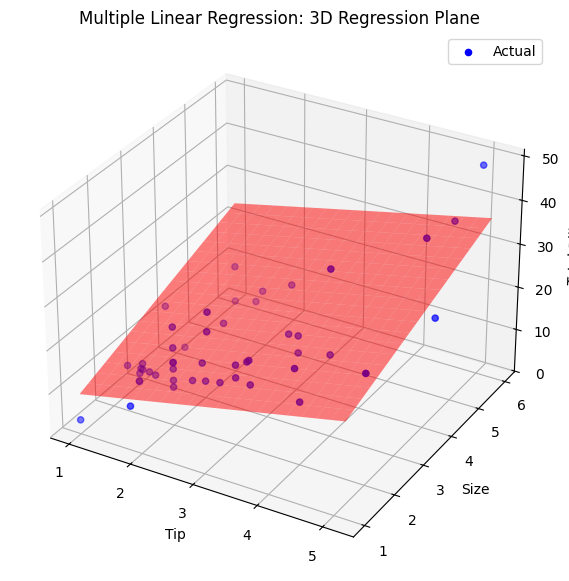

In [42]:
# plot the model
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual values
ax.scatter(X_test['tip'], X_test['size'], y_test, color='blue', label="Actual")

# Create a grid for the regression pla ne
tip_range = np.linspace(X_test['tip'].min(), X_test['tip'].max(), 20)
size_range = np.linspace(X_test['size'].min(), X_test['size'].max(), 20)
tip_grid, size_grid = np.meshgrid(tip_range, size_range)

# Predict values for the plane
X_grid = np.c_[tip_grid.ravel(), size_grid.ravel()]
y_pred_grid = model.predict(X_grid).reshape(tip_grid.shape)

# Plot the regression plane
ax.plot_surface(tip_grid, size_grid, y_pred_grid, color='red', alpha=0.5)

# Labels and title
ax.set_xlabel("Tip")
ax.set_ylabel("Size")
ax.set_zlabel("Total Bill")
ax.set_title("Multiple Linear Regression: 3D Regression Plane")

plt.legend()
plt.show()


In [43]:
# model evaluation
from sklearn.metrics import mean_squared_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 28.25791334064135
R-squared: 0.6667248660310816
